# Ví dụ 1

## Cách 1

     pcost       dcost       gap    pres   dres
 0: -1.9560e+02 -3.9870e+02  2e+02  1e-15  4e-15
 1: -1.9718e+02 -2.0001e+02  3e+00  2e-15  4e-15
 2: -1.9776e+02 -1.9779e+02  3e-02  3e-16  4e-15
 3: -1.9776e+02 -1.9776e+02  3e-04  2e-15  4e-15
 4: -1.9776e+02 -1.9776e+02  3e-06  2e-15  4e-15
Optimal solution found.


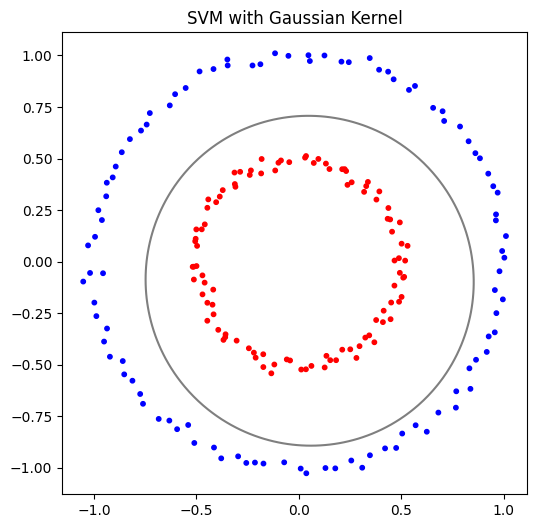

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import cvxopt
import cvxopt.solvers

# Các kernel
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, gamma=1, r=1, d=3):
    return (r + gamma * np.dot(x, y)) ** d

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

# Lớp SVM
class SVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = float(C) if C else None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-np.ones(n_samples))
        A = cvxopt.matrix(y, (1, n_samples), 'd')
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(-np.eye(n_samples))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G = cvxopt.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
            h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))

        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        a = np.ravel(solution['x'])

        sv = a > 1e-5
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        self.b = np.mean([self.sv_y[i] - np.sum(self.a * self.sv_y * K[ind, sv])
                          for i, ind in enumerate(np.where(sv)[0])])

        if self.kernel == linear_kernel:
            self.w = np.sum([self.a[i] * self.sv_y[i] * self.sv[i] for i in range(len(self.a))], axis=0)
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            return np.array([sum(a * y_sv * self.kernel(x, sv)
                        for a, y_sv, sv in zip(self.a, self.sv_y, self.sv)) + self.b for x in X])

    def predict(self, X):
        return np.sign(self.project(X))

# Tạo dữ liệu và huấn luyện
X, y = make_circles(n_samples=200, noise=0.02, factor=0.5)
y = np.where(y == 0, -1, 1)

clf = SVM(kernel=gaussian_kernel, C=1.0)
clf.fit(X, y)

# Vẽ kết quả
def plot_contour(clf, X, y):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=10)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    XX, YY = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.project(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.title("SVM with Gaussian Kernel")
    plt.show()

plot_contour(clf, X, y)

# Cách 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix, accuracy_score

# Tạo dữ liệu
X, Y = make_circles(n_samples=200, noise=0.02, factor=0.5)

# Huấn luyện và đánh giá theo từng kernel
kernels = ['linear', 'sigmoid', 'poly', 'rbf']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(X, Y)
    y_pred = clf.predict(X)

    acc = accuracy_score(Y, y_pred)
    cm = confusion_matrix(Y, y_pred)

    print(f"Kernel: {kernel}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)

Kernel: linear
Accuracy: 0.545
Confusion Matrix:
 [[42 58]
 [33 67]]
Kernel: sigmoid
Accuracy: 0.0
Confusion Matrix:
 [[  0 100]
 [100   0]]
Kernel: poly
Accuracy: 1.0
Confusion Matrix:
 [[100   0]
 [  0 100]]
Kernel: rbf
Accuracy: 1.0
Confusion Matrix:
 [[100   0]
 [  0 100]]


# Bài 1


 SVM - linear kernel
Accuracy: 54.50%


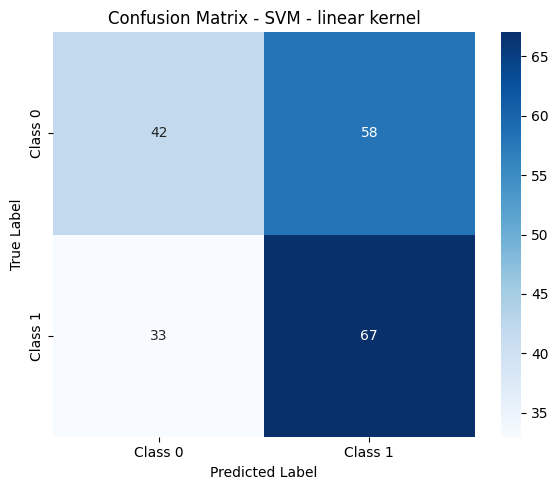


 SVM - sigmoid kernel
Accuracy: 0.00%


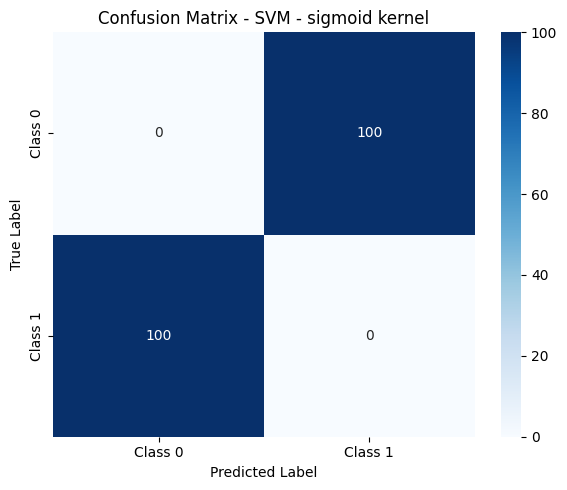


 SVM - poly kernel
Accuracy: 100.00%


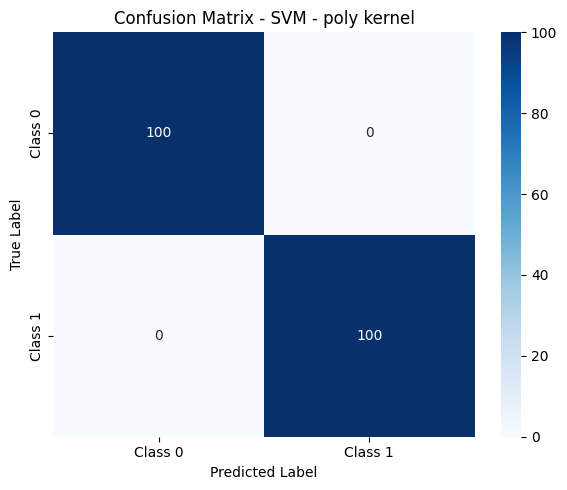


 SVM - rbf kernel
Accuracy: 100.00%


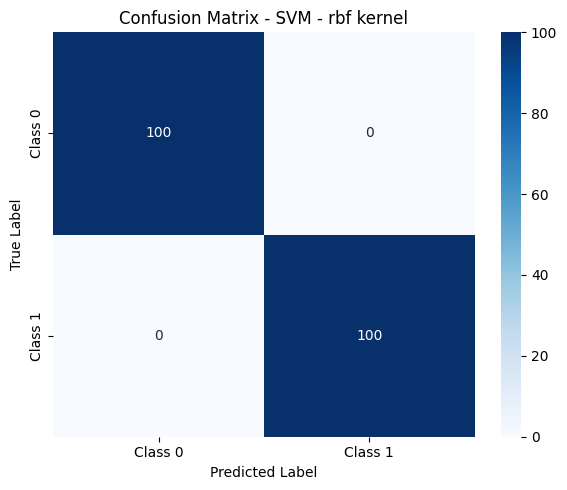

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, confusion_matrix

# Hàm đánh giá và hiển thị
def evaluate_and_plot(y_true, y_pred, method_name=""):
    acc = accuracy_score(y_true.flatten(), y_pred)
    cm = confusion_matrix(y_true.flatten(), y_pred)

    print(f"\n {method_name}")
    print(f"Accuracy: {acc * 100:.2f}%")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix - {method_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Tạo dữ liệu
X, y = make_circles(n_samples=200, noise=0.02, factor=0.5)

# Huấn luyện và đánh giá theo từng kernel
kernels = ['linear', 'sigmoid', 'poly', 'rbf']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    evaluate_and_plot(y, y_pred, method_name=f"SVM - {kernel} kernel")

# Ví dụ 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
data = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_13/data/ex2data2.txt', header=None)
data.columns = ['Test1', 'Test2', 'Label']

# Tách dữ liệu đầu vào và nhãn
X = data[['Test1', 'Test2']].values
y = data['Label'].values

In [6]:
def evaluate_and_plot(y_true, y_pred, method_name=""):
    acc = accuracy_score(y_true.flatten(), y_pred)
    cm = confusion_matrix(y_true.flatten(), y_pred)

    print(f"\n {method_name}")
    print(f"Accuracy: {acc * 100:.2f}%")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fail', 'Pass'],
                yticklabels=['Fail', 'Pass'])
    plt.title(f'Confusion Matrix - {method_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

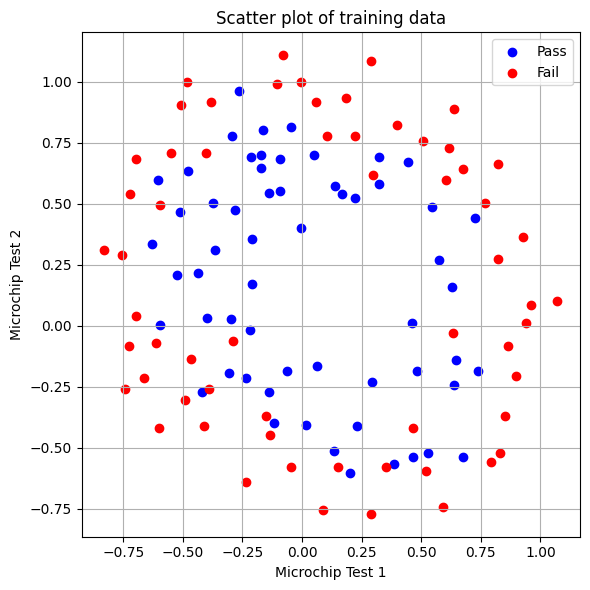

In [7]:
plt.figure(figsize=(6, 6))
mask = y == 1
plt.scatter(X[mask, 0], X[mask, 1], c='b', label='Pass')
plt.scatter(X[~mask, 0], X[~mask, 1], c='r', label='Fail')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.title('Scatter plot of training data')
plt.grid(True)
plt.tight_layout()
plt.show()


 SVM - linear kernel
Accuracy: 55.08%


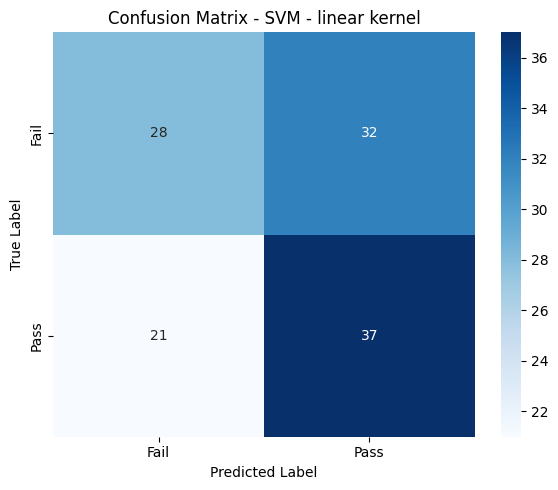

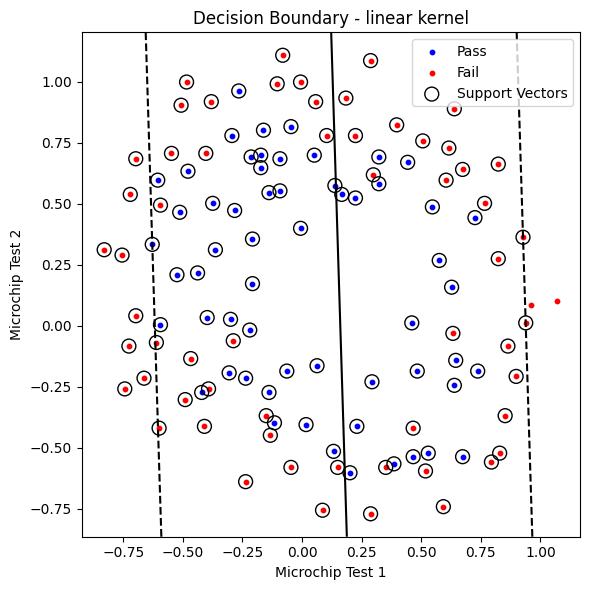


 SVM - poly kernel
Accuracy: 83.05%


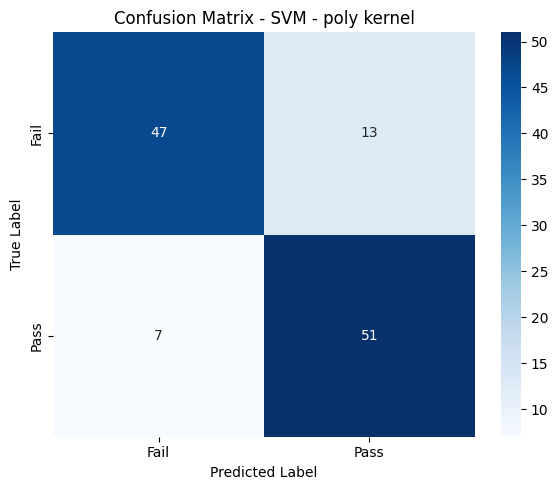

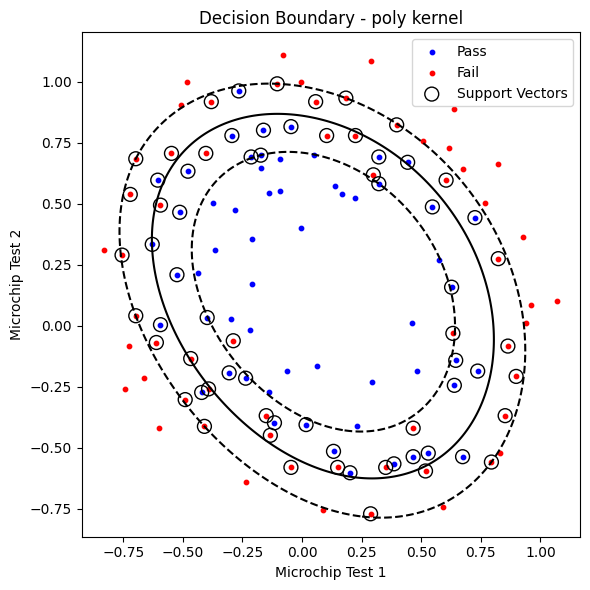


 SVM - rbf kernel
Accuracy: 81.36%


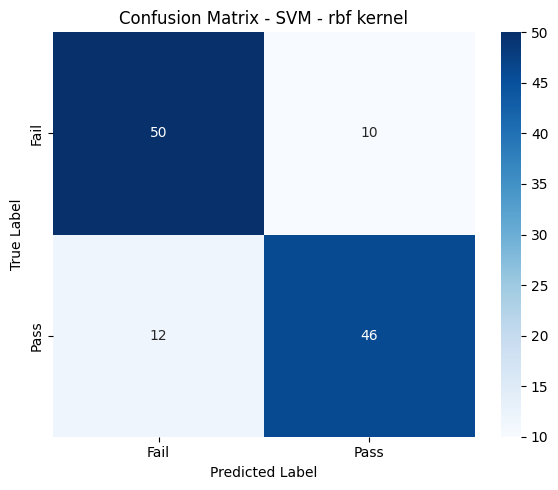

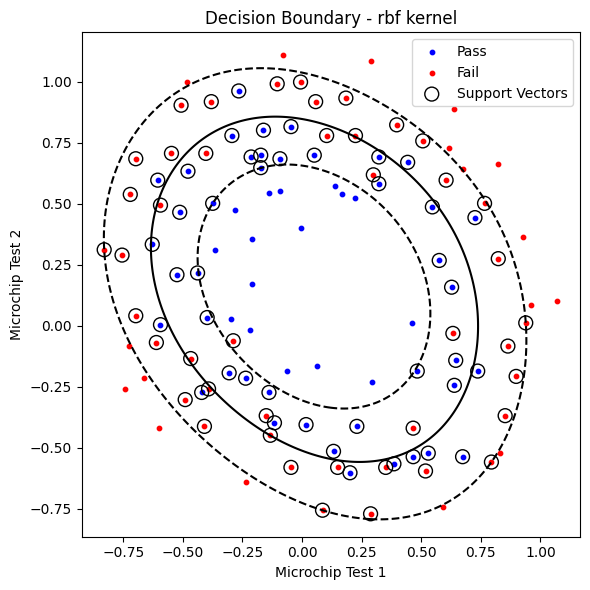


 SVM - sigmoid kernel
Accuracy: 25.42%


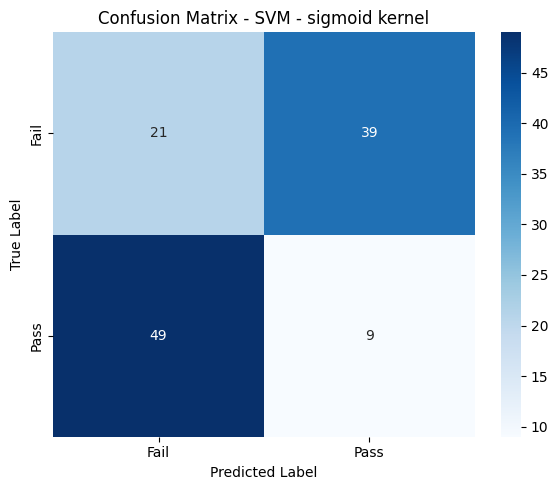

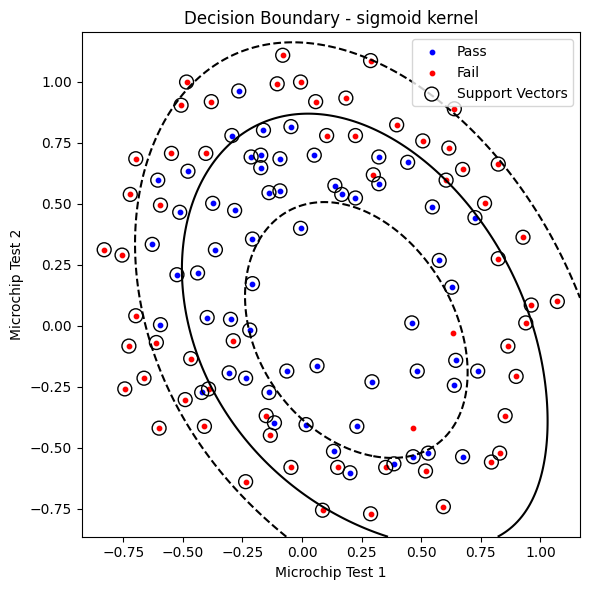

In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    evaluate_and_plot(y, y_pred, method_name=f"SVM - {kernel} kernel")

    # Vẽ biên phân lớp
    plt.figure(figsize=(6, 6))
    plt.scatter(X[mask, 0], X[mask, 1], c='b', label='Pass', s=10)
    plt.scatter(X[~mask, 0], X[~mask, 1], c='r', label='Fail', s=10)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                facecolors='none', edgecolors='k', s=100, label='Support Vectors')

    xlim = plt.xlim()
    ylim = plt.ylim()

    XX, YY = np.meshgrid(np.linspace(*xlim, 200),
                         np.linspace(*ylim, 200))
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])
    plt.title(f'Decision Boundary - {kernel} kernel')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Bài thực hành 1

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [13]:
import scipy.io as sio
from sklearn.svm import SVC

In [14]:
A = sio.loadmat('/home/vitquay1708/Study_Space/ml/week_13/data/ARgender.mat')
X_train = A['Y_train'].T
X_test = A['Y_test'].T
print(X_train.shape)
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

(700, 300)



 SVM - linear kernel
Accuracy: 90.29%


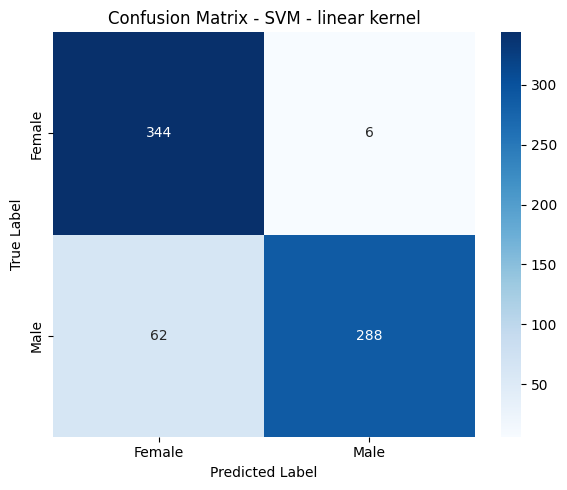


 SVM - poly kernel
Accuracy: 92.29%


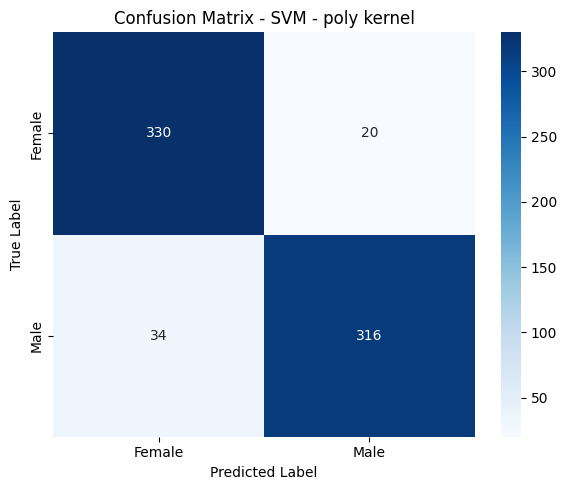


 SVM - rbf kernel
Accuracy: 90.86%


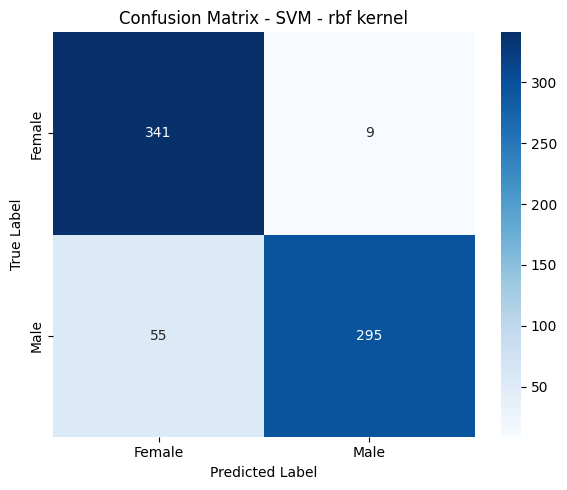


 SVM - sigmoid kernel
Accuracy: 89.43%


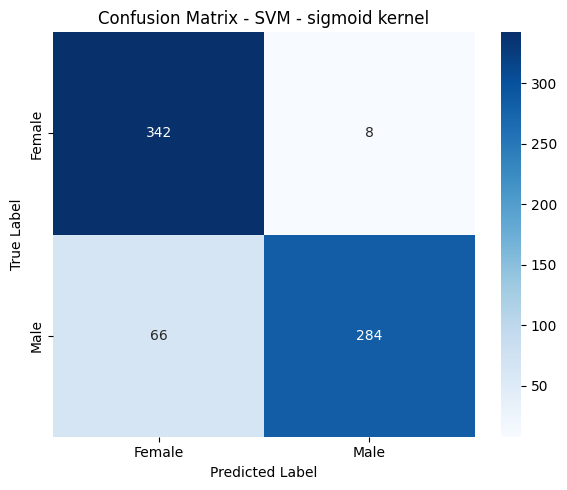

In [16]:
def evaluate_and_plot(y_true, y_pred, method_name=""):
    acc = accuracy_score(y_true.flatten(), y_pred)
    cm = confusion_matrix(y_true.flatten(), y_pred)

    print(f"\n {method_name}")
    print(f"Accuracy: {acc * 100:.2f}%")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Female', 'Male'],
                yticklabels=['Female', 'Male'])
    plt.title(f'Confusion Matrix - {method_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Danh sách các kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma='scale', coef0=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    evaluate_and_plot(y_test, y_pred, method_name=f"SVM - {kernel} kernel")
     

# Bài thực hành 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/home/vitquay1708/Study_Space/ml/week_13/data/dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Chuyển vị ma trận dữ liệu do ta đọc bằng Pandas => mỗi record là 1 dong
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)


 SVM - linear kernel
Accuracy: 90.00%


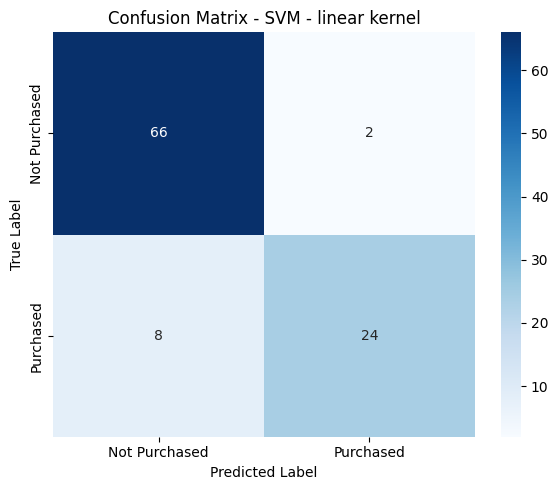


 SVM - poly kernel
Accuracy: 93.00%


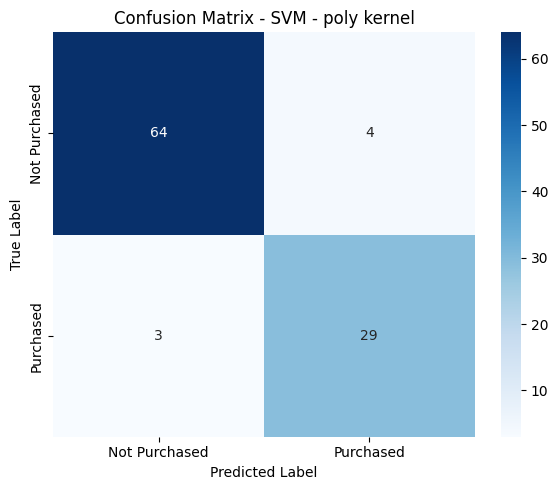


 SVM - rbf kernel
Accuracy: 93.00%


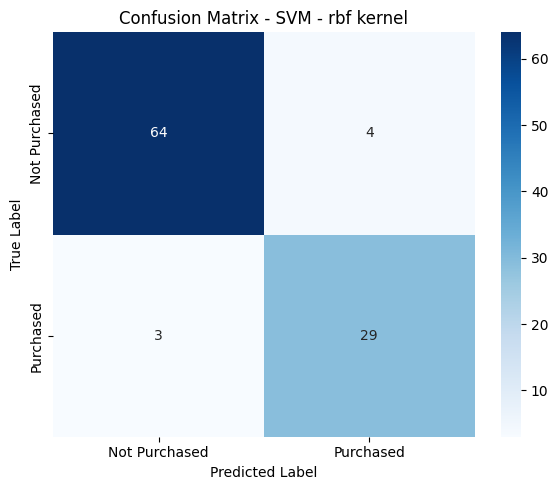


 SVM - sigmoid kernel
Accuracy: 71.00%


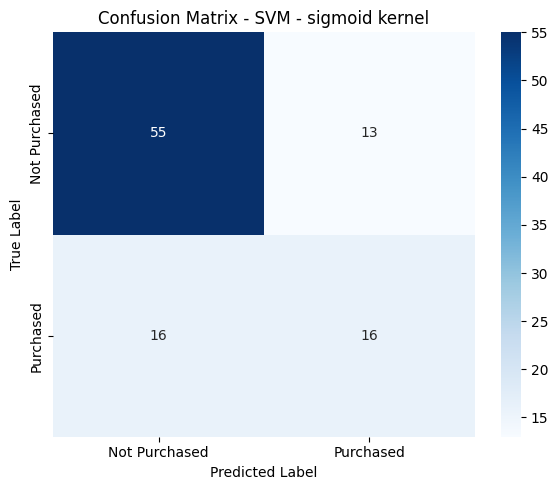

In [18]:
def evaluate_and_plot(y_true, y_pred, method_name=""):
    acc = accuracy_score(y_true.flatten(), y_pred)
    cm = confusion_matrix(y_true.flatten(), y_pred)

    print(f"\n {method_name}")
    print(f"Accuracy: {acc * 100:.2f}%")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Purchased', 'Purchased'],
                yticklabels=['Not Purchased', 'Purchased'])
    plt.title(f'Confusion Matrix - {method_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Danh sách kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Huấn luyện và đánh giá mô hình
for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma='scale', coef0=1)
    clf.fit(XTrain, yTrain)
    y_pred = clf.predict(XTest)
    evaluate_and_plot(yTest, y_pred, method_name=f"SVM - {kernel} kernel")

# Bài thực hành 3

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
plt.style.use('ggplot')
# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)
X = data.data
y = data.target  # 0 = malignant, 1 = benign

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


 SVM - linear kernel
Accuracy: 95.80%


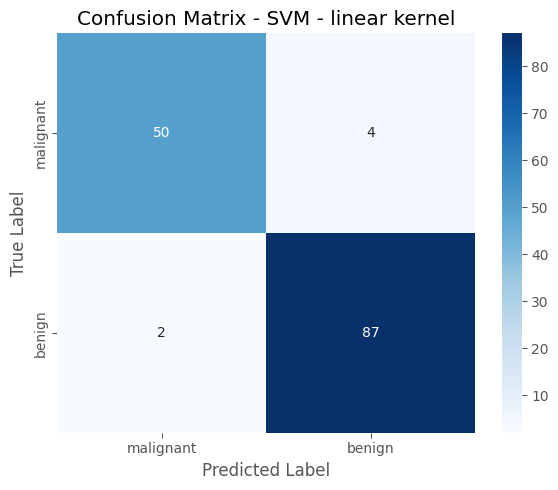


 SVM - poly kernel
Accuracy: 93.71%


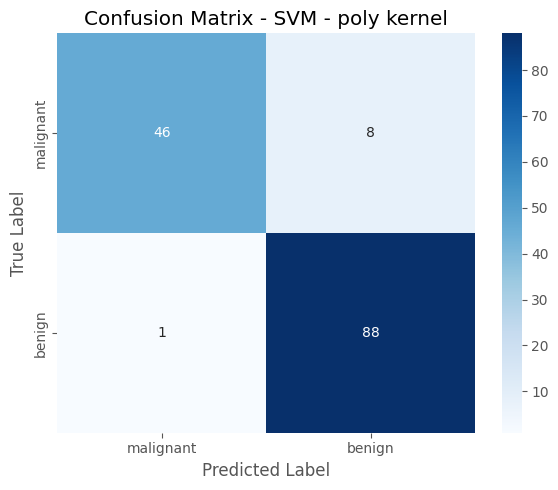


 SVM - rbf kernel
Accuracy: 95.10%


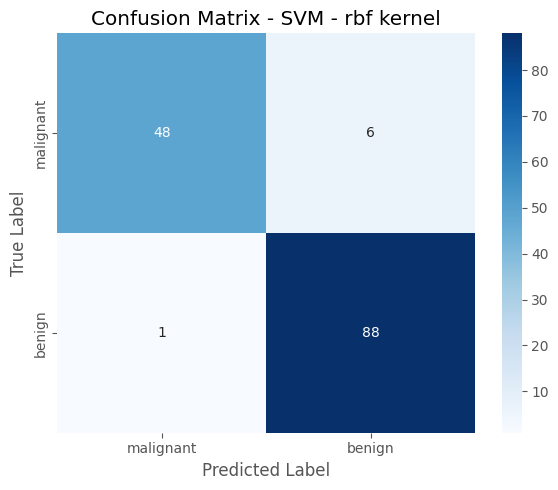


 SVM - sigmoid kernel
Accuracy: 62.24%


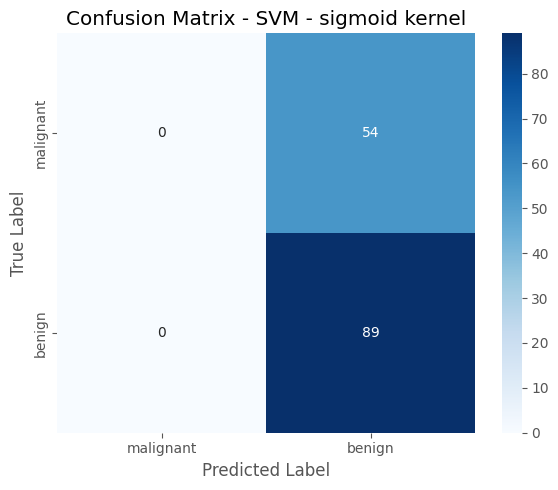

In [22]:
def evaluate_and_plot(y_true, y_pred, method_name=""):
    acc = accuracy_score(y_true.flatten(), y_pred)
    cm = confusion_matrix(y_true.flatten(), y_pred)

    print(f"\n {method_name}")
    print(f"Accuracy: {acc * 100:.2f}%")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.title(f'Confusion Matrix - {method_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Danh sách các kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Huấn luyện và đánh giá mô hình theo từng kernel
for kernel in kernels:
    clf = SVC(kernel=kernel, gamma='scale', coef0=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    evaluate_and_plot(y_test, y_pred, method_name=f"SVM - {kernel} kernel")